# Análisis de componentes principales

In [13]:
import mglearn
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

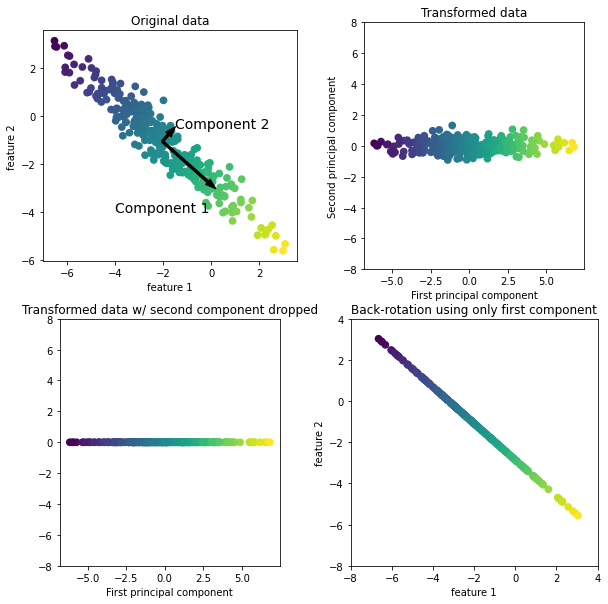

In [5]:
mglearn.plots.plot_pca_illustration()

## Ejercicio 16.1

In [50]:
data = pd.DataFrame(datasets.fetch_california_housing(as_frame=True)['data'])
data.head()

data2 = StandardScaler().fit_transform(data)

In [51]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
pca = PCA(n_components=2)
pca.fit(data2)
data3 = pca.transform(data2)

In [11]:
from sklearn.cluster import KMeans

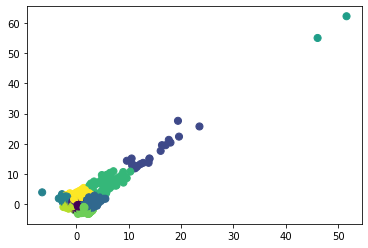

In [49]:
cluster = KMeans(n_clusters=10).fit(data3)
labels = cluster.labels_
plt.scatter(data3[:, 0], data3[:, 1], c=labels, s=50)

In [21]:
cluster2 = KMeans(n_clusters=4).fit(data2)
labels2 = cluster2.labels_

## Ejercicio 16.2

## A continuación hacemos una prueba con datos etiquetados para saber si la descomposición a 2 componentes principales tiene sentido

In [42]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'

data = pd.read_csv(source, sep=';')
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [43]:
from sklearn.preprocessing import LabelEncoder
data.dropna(inplace=True)
label = LabelEncoder().fit_transform(data.Spending_Score.values)
data.drop(['ID', 'Set', 'Spending_Score'], axis=1, inplace=True)

In [44]:
data_new = pd.get_dummies(data, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession'])

In [45]:
pca = PCA(n_components=2)
pca.fit(data_new)
data_pca = pca.transform(data_new)

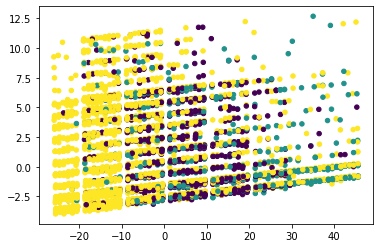

In [47]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=label, s=20)

## Las dos dimensiones no son suficientes para clasificar estos datos